In [72]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import imageio

## Age Distribution Visualization
We re-create age distribution demographic visualization using our selected countries and year based on tutorial by Oscar Leo, https://github.com/oscarleoo/age-distribution-tutorial

In [73]:
# Import all functions from age_dist_visual.py
sys.path.append(os.path.abspath(os.path.join("..", "src")))
from age_dist_visual import (
    set_seaborn_style, create_age_distribution, format_ticks,
    add_legend, create_image_from_figure, add_padding_to_chart,
    generate_country_figure, create_grid
)

We use data from the World Bank's Population Estimates and Projections database (latest version, updated December 2024). The dataset spans from 1960 to 2050, including actual historical data through 2024, and projections from 2025 onward. We visualize the data on total population and the age-group ratio for female and male.

https://datacatalog.worldbank.org/search/dataset/0037655/Population-Estimates-and-Projections

In [74]:
# Load data
population_female = pd.read_csv("../data/raw/population_absolute_female.csv", index_col=None)
population_male = pd.read_csv("../data/raw/population_absolute_male.csv", index_col=None)
population_ratio_female = pd.read_csv("../data/raw/population_ratio_female.csv", index_col=None)
population_ratio_male = pd.read_csv("../data/raw/population_ratio_male.csv", index_col=None)

# Set styles
font_family = "PT Mono"
background_color = "#253D5B"
grid_color = "#355882"
text_color = "#EEEEEE"
set_seaborn_style(font_family, background_color, grid_color, text_color)

### Creating One Plot

#### Absolute value

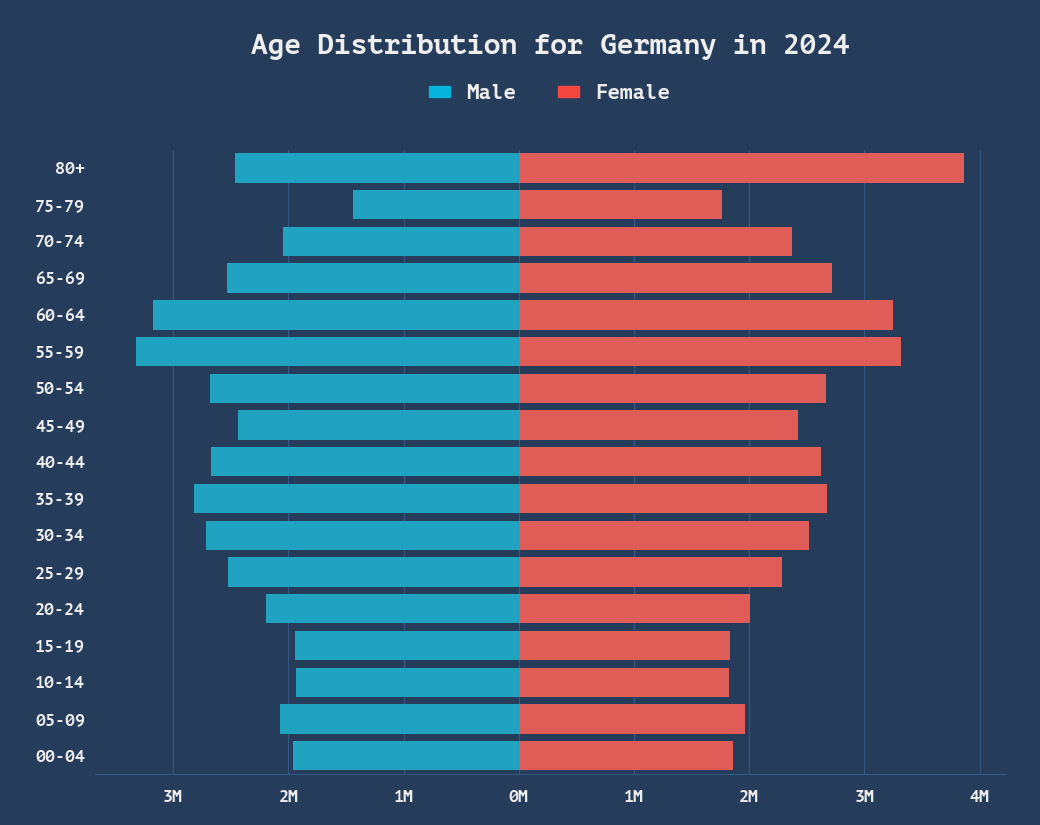

In [75]:
country_code = "DEU"
year = "2024"

country_name = population_female[population_female.country_code == country_code]["country_name"].iloc[0]
# Create plot
fig = plt.figure(figsize=(10, 8))
ax = create_age_distribution(population_female, population_male, country_code, year)
format_ticks(ax, xformat="millions")
add_legend(x=0.5, y=1.09, background_color=background_color)
plt.title(f"Age Distribution for {country_name} in {year}", y=1.14, fontsize=20)

# Convert to image and add padding
image = create_image_from_figure(fig)
image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
image

#### Percentage Ratio

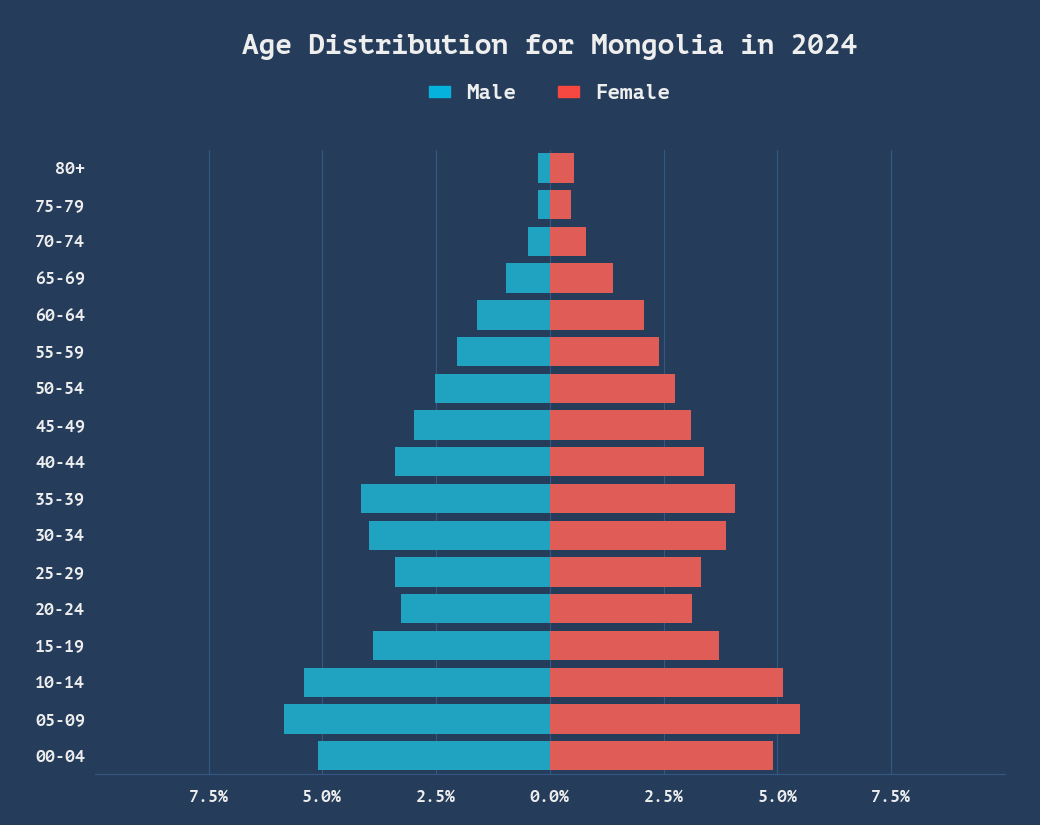

In [76]:
country_code = "MNG"
year = "2024"

country_name = population_ratio_female[population_ratio_female.country_code == country_code]["country_name"].iloc[0]
# Create plot
fig = plt.figure(figsize=(10, 8))
ax = create_age_distribution(population_ratio_female, population_ratio_male, country_code, year)
format_ticks(ax, xformat="percentage", xlim=(-10, 10))
add_legend(x=0.5, y=1.09, background_color=background_color)
plt.title(f"Age Distribution for {country_name} in {year}", y=1.14, fontsize=20)

# Convert to image and add padding
image = create_image_from_figure(fig)
image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
image

### Creating Grid Figures

In [77]:

country_codes = [
    'AND', 'ARG', 'AUS', 'ARM', 'BGD', 'BOL', 'BRA', 'CAN', 'CHL', 'CHN', 'COL', 'CYP', 'CZE', 'ECU', 'EGY', 'ETH',
    'DEU', 'GRC', 'GBR', 'GTM', 'HKG', 'IRL', 'IDN', 'IND', 'IRN', 'IRQ', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'LBN',
    'LBY', 'MDV', 'MEX', 'MYS', 'MNG', 'MAR', 'MMR', 'NLD', 'NZL', 'NIC', 'NGA', 'PAK', 'PER', 'PHL', 'PRI', 'ROU',
    'RUS', 'SGP', 'SRB', 'SVK', 'KOR', 'TJK', 'THA', 'TUR', 'TUN', 'UKR', 'USA', 'URY', 'UZB', 'VEN', 'VNM', 'ZWE'
] 
#Our default countries from World Survey which represent world condition
year = "2024"

# Generate figures
figures = []
for code in country_codes:
    country_name = population_ratio_female[population_ratio_female.country_code == code]["country_name"].iloc[0]
    image = generate_country_figure(
        female_df=population_ratio_female,
        male_df=population_ratio_male,
        country_code=code,
        year=year,
        background_color=background_color
    )
    figures.append(image)

# Display grid
grid = create_grid(figures, pad=20, ncols=4)
grid

### Creating Time Lapse 

In [78]:
images = []
years = [year for year in population_ratio_male.columns[4:] if 2000 <= int(year) <= 2025]  # Year columns start from index 4
country_code = "JPN"  

country_name = population_ratio_female[population_ratio_female.country_code == country_code]["country_name"].iloc[0]
for year in years:
    fig = plt.figure(figsize=(10, 8))

    ax = create_age_distribution(
        female_df=population_ratio_female,
        male_df=population_ratio_male,
        country_code=country_code,
        year=year
    )

    format_ticks(ax, xformat="percentage", xlim=(-10, 10))
    add_legend(x=0.5, y=1.09, background_color=background_color)

    plt.title(f"Age Distribution for {country_name} in     ", y=1.14, fontsize=21)
    plt.text(x=0.77, y=1.15, s=str(year), fontsize=21, transform=ax.transAxes)

    image = create_image_from_figure(fig)
    image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
    images.append(image)

In [79]:
# Add pause at the end
images = images + [images[-1]] * 20
# Save to gif in ./reports/figures
imageio.mimsave("../reports/figures/time-lapse.gif", images, duration=0.15)


## Health Expenditure Projection

### Preparing the data

In [80]:
df_GDPpercapita = pd.read_csv("../data/processed/GDP_percapita_clean.csv", index_col=None)
df_health = pd.read_csv("../data/processed/health_expenditure_clean.csv", index_col=None)
df_dependency_ratio = pd.read_csv("../data/processed/dependency_ratio_clean.csv", index_col=None)
df_dependency_ratio_old = pd.read_csv("../data/processed/dependency_ratio_old_clean.csv", index_col=None)
df_dependency_ratio_young = pd.read_csv("../data/processed/dependency_ratio_young_clean.csv", index_col=None)
df_population = pd.read_csv("../data/processed/pop_total_clean.csv", index_col=None)
df_income_level = pd.read_csv("../data/processed/income_level_clean.csv", index_col=None)


In [81]:
merged = df_population.merge(df_dependency_ratio_old, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_dependency_ratio_young, on=["ISO3", "Year", "Country"], how="outer") 
merged = merged.merge(df_health, on=["ISO3", "Year", "Country"], how="outer") 
merged = merged.merge(df_GDPpercapita, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_income_level, on=["ISO3", "Country"], how="left")


In [82]:
merged = merged.rename(columns={
    'Dependency_Ratio_x': 'Dependency_Ratio_Old',
    'Dependency_Ratio_y': 'Dependency_Ratio_Young'
})
merged.to_csv('../data/interim/merged_health_projection.csv', index=False)
merged

Country ISO3  Year  Population  Dependency_Ratio_Old  \
0      Andorra  AND  2000     65685.0             17.037131   
1      Andorra  AND  2001     65852.0             17.750480   
2      Andorra  AND  2002     66506.0             18.375441   
3      Andorra  AND  2003     69486.0             18.024104   
4      Andorra  AND  2004     74325.0             16.915487   
...        ...  ...   ...         ...                   ...   
3259  Zimbabwe  ZWE  2046  24462478.0              6.955037   
3260  Zimbabwe  ZWE  2047  24816446.0              7.345480   
3261  Zimbabwe  ZWE  2048  25168410.0              7.730128   
3262  Zimbabwe  ZWE  2049  25518501.0              8.109676   
3263  Zimbabwe  ZWE  2050  25866385.0              8.466266   

      Dependency_Ratio_Young  Health_Expenditure  GDP_percapita  \
0                  21.223794            5.952764   21810.248743   
1                  21.239368            5.858237   23511.295148   
2                  21.180964            5.996212   26528.130158   
3                  20.856235            5.547715   34063.578403   
4                  20.411293            5.288469   39021.127810   
...                      ...                 ...            ...   
3259               53.212607                 NaN            NaN   
3260               52.632537                 NaN            NaN   
3261               52.021825                 NaN            NaN   
3262               51.393276                 NaN            NaN   
3263               50.744613                 NaN            NaN   

             income_level  
0             High income  
1             High income  
2             High income  
3             High income  
4             High income  
...                   ...  
3259  Lower middle income  
3260  Lower middle income  
3261  Lower middle income  
3262  Lower middle income  
3263  Lower middle income  

[3264 rows x 9 columns]

### GDP per capita projection using log-linear regression

In [83]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [84]:
# Placeholder to collect all updated rows
results = []

# Loop by country
for country, group in df.groupby("Country"):
    group = group.sort_values("Year").copy()

    # Subset to years with valid GDP
    train = group[(group["Year"] <= 2020) & (group["GDP_percapita"].notna())]

    if len(train) >= 5:  # at least 5 points to estimate trend
        X = train[["Year"]]
        y = np.log(train["GDP_percapita"])  # log transform for log-linear

        model = LinearRegression().fit(X, y)

        # Predict future values for 2021–2050
        group_future = group[group["Year"] > 2020].copy()
        X_future = group_future[["Year"]]
        y_pred_log = model.predict(X_future)
        y_pred = np.exp(y_pred_log)  # back-transform

        group_future["GDP_percapita"] = y_pred

        # Update main group
        group.update(group_future)

    results.append(group)

# Combine all countries
df_updated = pd.concat(results)

df_updated.to_csv("../data/interim/merged_health_projection_2.csv", index=False)

### Projection Model

$$
\text{HealthExp\%GDP}_{it} = \beta_0 + \beta_1 \cdot \text{DepOld}_{it} + \beta_2 \cdot \text{DepYoung}_{it} + \beta_3 \cdot \text{GDPpc}_{it} + \epsilon_{it}
$$

- $\beta_0$: constant term  
- $\beta_1$: effect of aging 
- $\beta_2$: effect of youth burden 
- $\beta_3$: effect of GDP per capita 
- $\epsilon_{it}$: error term for country $i$ in year $t$


### Health Expenditure Projection

In [85]:
import pandas as pd

# Load the latest file that contains projected GDP_percapita
df = pd.read_csv("../data/interim/merged_health_projection_2.csv")


In [86]:
import statsmodels.formula.api as smf
df_model = df[
    (df["Year"] <= 2020) &
    df["Health_Expenditure"].notna() &
    df["Dependency_Ratio_Old"].notna() &
    df["Dependency_Ratio_Young"].notna() &
    df["GDP_percapita"].notna()
]

model = smf.ols(
    formula="Health_Expenditure ~ Dependency_Ratio_Old + Dependency_Ratio_Young + GDP_percapita",
    data=df_model
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Health_Expenditure   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     326.4
Date:                Fri, 16 May 2025   Prob (F-statistic):          6.84e-157
Time:                        21:17:06   Log-Likelihood:                -2654.3
No. Observations:                1268   AIC:                             5317.
Df Residuals:                    1264   BIC:                             5337.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

In [87]:
# List of predictors
predictors = ["Dependency_Ratio_Old", "Dependency_Ratio_Young", "GDP_percapita"]

# Select data to forecast
df_future = df[
    (df["Year"] > 2020) &
    df["Health_Expenditure"].isna() &
    df["Dependency_Ratio_Old"].notna() &
    df["Dependency_Ratio_Young"].notna() &
    df["GDP_percapita"].notna()
].copy()

# Run prediction
df_future["Health_Expenditure"] = model.predict(df_future[predictors])

# Update original dataframe
df.update(df_future)


In [88]:
# Save the final projection dataset
df.to_csv("../data/interim/health_projection_3.csv", index=False)